## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv",names=headers)

### WORK WITH MISSING DATA

In [4]:
#replace missing data to NaN
df.replace('?',np.nan,inplace=True)

### EVALUATING MISSING DATA

In [5]:
#Check missing data

missing_values = df.isnull()


In [6]:
#Counting missing values from columns
for columns in missing_values.columns.values.tolist():
    print(columns)
    print (missing_values[columns].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

<h3> Columns with missing data </h3>

<h4> Replaced by mean </h4>
<ol>
    <li>Normalized Losses: 41</li>
    <li>Bare: 4</li>
    <li>Stroke: 4</li>
    <li>Horsepower: 2</li>
    <li>Peak-rpm: 2</li>
</ol>
<h4> Replaced by Frenquenty </h4>
<ol>
    <li>Num of doors: 2</li>
</ol>
<h4> Dropped </h4>
<ol>
    <li>Price 4</li>
</ol>

## REPLACING DATA

#### REPLACING  BY MEAN

In [7]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
normalized_losses_mean = df['normalized-losses'].astype('float').mean()
#Convert the series as a float series then calculate the mean

In [9]:
df['normalized-losses'].replace(np.nan,normalized_losses_mean, inplace=True)

In [10]:
bore_mean = df['bore'].astype('float').mean()

In [11]:
df['bore'].replace(np.nan,bore_mean,inplace=True)

In [12]:
stroke_mean = df['stroke'].astype('float').mean()

In [13]:
df['stroke'].replace(np.nan,stroke_mean,inplace=True)

In [14]:
horsepower_mean = df['horsepower'].astype('float').mean()

In [15]:
df['horsepower'].replace(np.nan,horsepower_mean,inplace=True)

In [16]:
peak_rpm_mean = df['peak-rpm'].astype('float').mean()

In [17]:
df['peak-rpm'].replace(np.nan,peak_rpm_mean,inplace=True)

#### REPLACING BY MODE

In [18]:
df['num-of-doors'].replace(np.nan,"four",inplace=True)

#### DROP ROWS

In [19]:
#drop the null values rows in subset price
df.dropna(subset=['price'],axis=0,inplace=True)

In [20]:
#reset index beacuse we previusly droped rows
df.reset_index(drop=True, inplace=True)

In [21]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## CORRECT DATA FORMAT

In [22]:
df[['bore','stroke']] = df[['bore','stroke']].astype('float')
#Convert bore and stroke columns into floats column

In [23]:
df['normalized-losses'] = df['normalized-losses'].astype('int')

In [24]:
df['price'] = df['price'].astype('float')
df['peak-rpm'] = df['peak-rpm'].astype('float')

In [25]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## DATA STANDARDIZATION

In [26]:
df['City-L/100km'] =  235/df['city-mpg']

In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,City-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [28]:
df['highway-mpg'] = 235/df['highway-mpg']

In [29]:
df.rename(columns={'highway-mpg':"highway-L/100km"},inplace=True)

In [30]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,City-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


## DATA NORMALIZATION

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()

In [36]:
df[['length','width']] = sc.fit_transform(df[['length','width']])

## DATA BINNING

In [40]:
df['horsepower']  = df['horsepower'].astype('int')

Text(0.5, 1.0, 'Horse power')

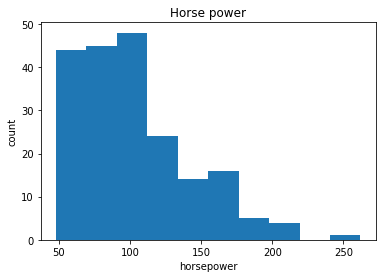

In [93]:
plt.hist(df['horsepower'])
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title("Horse power")


<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>

In [95]:
bins =  np.linspace(min(df["horsepower"]),max(df["horsepower"]),4)


In [47]:
group_names = ['Low','Medium','High']

In [57]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
#We apply the function "cut" the determine what each value of 

In [55]:
df[["horsepower","horsepower-binned"]].head()

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


Text(0, 0.5, 'count')

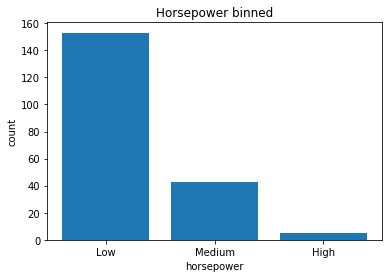

In [63]:
plt.bar(group_names,df["horsepower-binned"].value_counts())
plt.title("Horsepower binned")
plt.xlabel("horsepower")
plt.ylabel("count")

## INDICATOR VARIABLE

In [67]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,City-L/100km,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low


In [71]:
dummy_car_type = pd.get_dummies(df['fuel-type'])

In [79]:
 df = pd.concat([df,dummy_car_type],axis=1)

In [80]:
df.drop("fuel-type",axis=1,inplace=True)

In [82]:
dummy_aspiration =  pd.get_dummies(df['aspiration'])

In [84]:
dummy_aspiration.rename(columns={'std':'aspiration-std','turbo':"aspiration-turbo"},inplace=True)

In [86]:
df = pd.concat([df,dummy_aspiration],axis=1)

In [87]:
df.drop("aspiration",axis=1,inplace=True)

In [88]:
df.to_csv("clean_df.csv")

In [89]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,City-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,-0.439409,-0.853460,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,-0.439409,-0.853460,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,-0.244152,-0.185597,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.195176,0.148335,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.195176,0.243744,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0
